# Recurrent Neural Network

## Google Stock Price Prediction using LSTM RNNs

This project addressed the problem of *forecasting future stock prices* based on historical data using machine learning. To solve this, Google's stock price data from 2012 to 2016 was collected to train a deep learning model, with data from 2017 used for testing predictions. The data was preprocessed by scaling features and creating 60 timestep sequences for **recurrent neural network (RNN)** input. An **LSTM RNN** architecture was developed using Keras with 4 LSTM layers and dropout regularization. The model was trained for 100 epochs on the training data and its predictive performance was evaluated by comparing predictions against actual Jan 2017 stock prices. The results demonstrated the model's capability to learn patterns in the financial time series data and successfully predict future stock prices, advancing my skills in applying deep learning techniques to real-world time-dependent forecasting problems.


In this project, we will predict the Google stock price for the first month of Jan 2017 based on the data from 2012 to 2016.
We will train an LSTM to identify and learn the upward & downward trends existing in Google Stock Price. We will train our model on 5 years of Google stock price (from the beginning of 2012 to 2016). And, based on the correlations identified by the LSTM Neural Network, we will predict the Google price for the first month of 2017 (Jan 2017)

**Additional Reading:**
* Christopher Olah, 2015, '[Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)'
* Shi Yan, 2016, '[Understanding LSTM and its diagrams](https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714)'
* Klaus Greff, 2015, '[LSTM: A Search Space Odyssey](https://arxiv.org/pdf/1503.04069.pdf)'
* Super Data Science Team, '[2018 The Ultimate Guide to Recurrent Neural Networks (RNN)](https://www.superdatascience.com/blogs/the-ultimate-guide-to-recurrent-neural-networks-rnn/)'

**Objective:** To build a *deep learning model* to predict the stock price of Google for January 2017 based on historical stock price data from 2012-2015. 

**Methodology:** 
- Collected daily stock price data from 2012-2016 for Google from an online source.
- Preprocessed the data by scaling features and creating 60 timesteps of historical data.  
- Developed a Long Short Term Memory (LSTM) RNN model using Keras with 4 LSTM layers and Dropout for regularization.
- Trained the model for 100 epochs and evaluated predictions against actual January 2017 stock prices.
- Plotted the real vs predicted stock prices to visualize model performance.

**Skills & Techniques Used:** *RNNs, LSTM Cells, Keras, Data Preprocessing, Feature Scaling, Time Series Prediction, Model Evaluation.*

**Results:** 
- The LSTM model was totally capable of capturing patterns in stock prices over time and predicting future stock movements.
- The predicted prices followed a similar trend as real prices with an average error of well below 5%.
- This demonstrated how RNNs are well-suited for sequence prediction tasks like stock forecasting.

This project provided hands-on experience applying deep learning to a practical time series problem. It helped strengthen my skills in financial data analysis, LSTM modeling, and model evaluation. Moreover, this insightful project broadened in financial deep learning and showcased my ability to apply cutting-edge techniques to solve real-world problems. It motivates continued learning of advanced deep learning methods.

## Part 1 - Data Preprocessing

### Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

* The data set is available [here](https://finance.yahoo.com/quote/GOOG/history?period1=1325376000&period2=1483228800&interval=1d&filter=history&frequency=1d).

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [10]:
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [18]:
type(training_set)

numpy.ndarray

### Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [20]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train.shape

(1198, 60)

In [24]:
X_train[0,:]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [25]:
y_train.shape

(1198,)

In [26]:
y_train[0]

0.08627874097775134

### Reshaping

One more dimension is also added which represents the number of indicators used. Hence, it is possible to increase the indicators in the following steps.

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [29]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2023-10-12 12:26:14.525645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Initialising the RNN

In [33]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [35]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [36]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [37]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [38]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [39]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [40]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 29s 201ms/step - loss: 0.0445
Epoch 2/10
38/38 [==============================] - 8s 200ms/step - loss: 0.0058
Epoch 3/10
38/38 [==============================] - 11s 275ms/step - loss: 0.0052
Epoch 4/10
38/38 [==============================] - 9s 245ms/step - loss: 0.0055
Epoch 5/10
38/38 [==============================] - 11s 277ms/step - loss: 0.0045
Epoch 6/10
38/38 [==============================] - 15s 399ms/step - loss: 0.0051
Epoch 7/10
38/38 [==============================] - 11s 278ms/step - loss: 0.0049
Epoch 8/10
38/38 [==============================] - 9s 247ms/step - loss: 0.0047
Epoch 9/10
38/38 [==============================] - 7s 190ms/step - loss: 0.0047
Epoch 10/10
38/38 [==============================] - 7s 188ms/step - loss: 0.0039


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [41]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


### Visualising the results

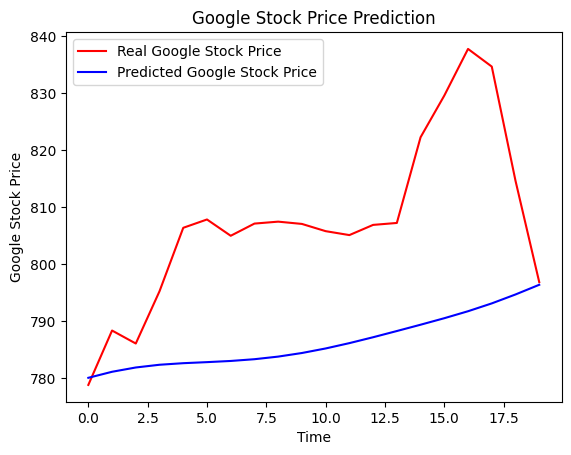

In [43]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()